<a href="https://colab.research.google.com/github/mikiiiiiiiiiiiiiiiiiiii/progetto_esame_AI/blob/main/prova__con_dataset_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [23]:
(keras_x_train, keras_y_train), (keras_x_val, keras_y_val) = fashion_mnist.load_data()
# Each training and test example is assigned to one of the following labels:

class_map = {0:'T-shirt/top',
             1:'Trouser',
             2:'Pullover',
             3:'Dress',
             4:'Coat',
             5:'Sandal',
             6:'Shirt',
             7:'Sneaker',
             8:'Bag',
             9:'Ankle boot'}


In [24]:
class_map.values()

dict_values(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

In [25]:
np.shape(keras_x_train.T)
np.shape(np.transpose(keras_y_train))

(60000,)

In [27]:
w = keras_x_train[:,:,0]
for index, valore in enumerate(range(1 , np.shape(keras_x_train)[2])):
 w = np.hstack((w , keras_x_train[:,:,index]))
x = keras_x_val[:,:,0]
for i, v in enumerate(range(1 , np.shape(keras_x_val)[2])):
 x = np.hstack((x , keras_x_val[:,:,i]))
print('shape di x train', np.shape(w), '\nshape di x val', np.shape(x))

shape di x train (60000, 784) 
shape di x val (10000, 784)


In [31]:
col = []
for i in range(np.shape(w)[1]):
  col.append('pixel_'+ str(i))
x_train = pd.DataFrame(w , columns = col)
y_train = pd.DataFrame(keras_y_train , columns = ['labels'])
x_val = pd.DataFrame(x , columns = col)
y_val = pd.DataFrame(keras_y_val , columns = ['labels'])

# one hot encode target values to_categorical

In [32]:
np.shape(y_train.to_numpy().T)

(1, 60000)

In [33]:
# scaler1=StandardScaler()
# scaler2=StandardScaler()
# scaler1.fit(x_train)

# scaler2.fit_transform(y_train)
# scaler1.transform(x_val)
# scaler2.transform(y_val)
# myparamas=scaler1.get_params()
# myparamas

In [34]:
#Eda
x_train.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_744,pixel_745,pixel_746,pixel_747,pixel_748,pixel_749,pixel_750,pixel_751,pixel_752,pixel_753,pixel_754,pixel_755,pixel_756,pixel_757,pixel_758,pixel_759,pixel_760,pixel_761,pixel_762,pixel_763,pixel_764,pixel_765,pixel_766,pixel_767,pixel_768,pixel_769,pixel_770,pixel_771,pixel_772,pixel_773,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000800,0.007117,0.026133,0.060533,0.119917,0.276417,0.471750,0.765283,1.003017,1.22025,1.534833,1.905033,2.308067,2.694483,3.665750,6.279017,9.144800,9.413567,7.692750,6.861867,6.652017,5.913417,4.746017,3.322950,1.923633,0.942217,0.277933,0.023333,0.000800,0.007117,0.026133,0.060533,0.119917,0.276417,0.471750,0.765283,1.003017,1.22025,1.534833,1.905033,...,61.630117,58.501450,55.246800,51.581983,44.656117,38.268533,31.768650,25.24040,19.541517,13.793933,9.115983,2.706333,0.097650,0.467867,1.134667,2.154250,3.939917,6.899033,10.183950,13.52220,17.481917,22.366733,28.815733,35.690717,41.640400,46.301117,50.020467,53.328417,54.123633,50.927767,47.313767,41.944850,33.851400,28.050083,21.955633,16.064600,11.259717,7.057667,3.783350,0.819000
std,0.092554,0.566072,1.683319,2.393755,3.098359,5.237802,6.991367,8.979783,10.394085,11.45923,13.157762,14.645725,15.997666,17.628285,20.104775,25.153062,29.456652,29.184226,26.167396,25.120841,25.260462,23.923438,21.712367,17.954226,13.753861,9.421634,4.947622,0.927435,0.092554,0.566072,1.683319,2.393755,3.098359,5.237802,6.991367,8.979783,10.394085,11.45923,13.157762,14.645725,...,86.981035,84.718461,82.740041,80.570559,76.900067,73.499837,68.094814,61.93865,55.057621,46.377868,37.582833,17.258682,2.934722,8.000829,12.928121,18.089288,24.142631,31.966764,38.940933,44.51107,50.343576,56.244110,63.444468,70.462782,76.508868,81.256929,84.119513,86.510800,86.412927,83.649679,80.886952,76.751771,70.824694,66.255440,59.223261,51.331146,43.054014,33.781255,24.379595,9.133252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [35]:
x_val.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_744,pixel_745,pixel_746,pixel_747,pixel_748,pixel_749,pixel_750,pixel_751,pixel_752,pixel_753,pixel_754,pixel_755,pixel_756,pixel_757,pixel_758,pixel_759,pixel_760,pixel_761,pixel_762,pixel_763,pixel_764,pixel_765,pixel_766,pixel_767,pixel_768,pixel_769,pixel_770,pixel_771,pixel_772,pixel_773,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,70,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,150,161,162,189,220,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,48,119,178,165,189,196,184,206,151,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,58,70,84,135,111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
y_train.describe()

,labels
count,60000.000000
mean,4.500000
std,2.872305
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


In [37]:
y_val.describe()

,labels
count,10000.000000
mean,4.500000
std,2.872425
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


In [38]:
one = x_train.isnull().sum().sum()
two = y_train.isnull().sum().sum() 
three = x_val.isnull().sum().sum()
four = y_val.isnull().sum().sum()
print(one + two + three + four , 'missing values')

0 missing values


In [39]:
#y_train.groupby('class').size()

In [40]:
#y_val.groupby('label').size()

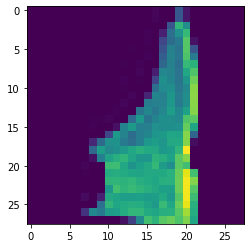

In [41]:
# image at row 0 in validation [scarpa(?)]
image = x_val.iloc[0,:]
image = np.array(image).T
image = image.reshape((28,28))
plt.figure()
plt.imshow(image)

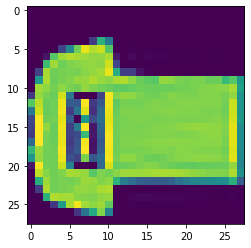

In [42]:
# image at row 1 in train [maglietta(?)]
image = x_train.iloc[1,:]
image = np.array(image)
image = image.reshape((28,28))
plt.figure()
plt.imshow(image)

In [43]:
# CNN 
model_CNN = Sequential([
                  layers.Input(shape=(28,28,1)) ,
                  layers.Conv2D(filters=32 , kernel_size=(3,3) , activation='relu' , padding='same'),
                  layers.MaxPool2D(pool_size=(2,2) , strides=2),
                  layers.Conv2D(filters=64 , kernel_size=(3,3) , activation='relu' , padding='same'),
                  layers.Flatten(),
                  layers.Dense(units=100 , activation='relu'),
                  layers.Dense(units=10 , activation='softmax')
                  ])

In [44]:
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 100)               1254500   
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

In [45]:
# Scale images to the [0, 1] range
keras_x_train = keras_x_train.astype("float32") / 255
keras_x_val = keras_x_val.astype("float32") / 255

#compiling the model
model_CNN.compile( optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['MeanSquaredError','AUC','accuracy'])
#fitting the model
modello_allenato = model_CNN.fit( keras_x_train , keras.utils.to_categorical(y_train) , epochs=100 , batch_size=128 , validation_data = (keras_x_val , keras.utils.to_categorical(y_val)),
              callbacks = [ EarlyStopping(monitor = 'loss' , patience=50 , restore_best_weights = True)])

Epoch 1/100
469/469 [==============================] - 20s 15ms/step - loss: 0.4279 - mean_squared_error: 0.0216 - auc: 0.9886 - accuracy: 0.8483 - val_loss: 0.3162 - val_mean_squared_error: 0.0164 - val_auc: 0.9929 - val_accuracy: 0.8864
Epoch 2/100
469/469 [==============================] - 6s 13ms/step - loss: 0.2760 - mean_squared_error: 0.0144 - auc: 0.9946 - accuracy: 0.9015 - val_loss: 0.3045 - val_mean_squared_error: 0.0158 - val_auc: 0.9934 - val_accuracy: 0.8901
Epoch 3/100
469/469 [==============================] - 6s 13ms/step - loss: 0.2281 - mean_squared_error: 0.0120 - auc: 0.9962 - accuracy: 0.9171 - val_loss: 0.2512 - val_mean_squared_error: 0.0131 - val_auc: 0.9952 - val_accuracy: 0.9108
Epoch 4/100
469/469 [==============================] - 6s 13ms/step - loss: 0.1965 - mean_squared_error: 0.0104 - auc: 0.9971 - accuracy: 0.9282 - val_loss: 0.2332 - val_mean_squared_error: 0.0122 - val_auc: 0.9952 - val_accuracy: 0.9157
Epoch 5/100
469/469 [==========================

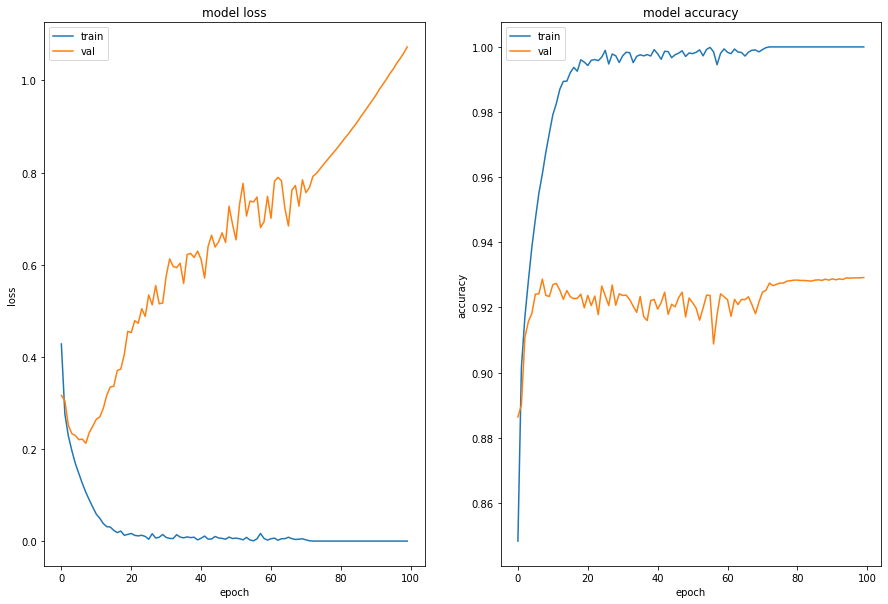

In [46]:
df_metriche = pd.DataFrame(modello_allenato.history)

fig , axes= plt.subplots(1,2)
# first plot
axes[0].plot(df_metriche.index , df_metriche['loss'] , df_metriche['val_loss'])
axes[0].set_title('model loss')
axes[0].set(xlabel = 'epoch' , ylabel = 'loss')
axes[0].legend(['train', 'val'] , loc = 'upper left')
#second plot
axes[1].plot(df_metriche.index , df_metriche['accuracy'] , df_metriche['val_accuracy'])
axes[1].set_title('model accuracy')
axes[1].set(xlabel = 'epoch' , ylabel = 'accuracy')
axes[1].legend(['train', 'val'] , loc = 'upper left')
fig.set_figheight(10)
fig.set_figwidth(15)

In [47]:
#RANDOM FOREST 
random_forest = RandomForestClassifier(criterion = 'entropy')
random_forest.fit(x_train , y_train)
random_forest.score(x_val , y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8772

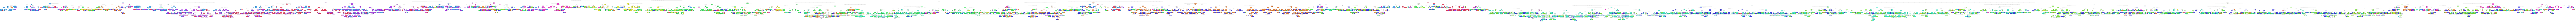

In [49]:
 # dec_path=random_forest.decision_path(x_train)
# Features_imp=random_forest.feature_importances_
from sklearn.tree import export_graphviz
estimator = random_forest.estimators_[5]

# Export as dot file
export_graphviz(estimator, 
                out_file ='tree.dot', 
                feature_names = x_train.columns,
                class_names =class_map ,# ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','SneakerBag','Ankle boot'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [50]:
#svm classifier
SUPP_VEC_MAC_CLASS = make_pipeline(StandardScaler(),LinearSVC())
SUPP_VEC_MAC_CLASS.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC())])

In [51]:
SUPP_VEC_MAC_CLASS.score(x_val,y_val)

0.8275